In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
# 통계량 계산이나 기본적인 데이터분석을 위한 패키지
import scipy as sp
import scipy.stats

#시각화 패키지
import matplotlib as mpl
import matplotlib.pyplot as plt

#시각화에서 한글을 사용하기 위한 설정
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    
#윈도우의 경우
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)

#시각화에서 음수를 표현하기 위한 설정
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False 

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한 
%precision 3

# precision은 소수점은 과학적 표기법으로 변환할 자릿수를 설정
# 아래와 같이 하면 소수점 셋째 자리 밑으로는 과학적 표기법으로 표시
pd.options.display.precision = 3

# 경고창 지우기 - 경진대회에서만 사용
import warnings
warnings.filterwarnings('ignore')

In [2]:
# 파이썬≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 공통 모듈 임포트
import numpy as np
import pandas as pd
import os
import keras

# 깔끔한 그래프 출력을 위해 
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

mpl.rcParams['axes.unicode_minus'] = False

# Jupyter Notebook의 출력을 소수점 이하 3자리로 제한
%precision 3

import seaborn as sns

import scipy as sp
from scipy import stats

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 노트북 실행 결과를 동일하게 유지하기 위해
# np.random.seed(42)

### 데이터 불러오기

In [3]:
vod = pd.read_csv('project_lgdata/ANSI_vod_20240301.csv', encoding ='cp949')
# contents = pd.read_csv('project_lgdata/ANSI_contents_20240301.csv',  encoding ='cp949')
# channel = pd.read_csv('project_lgdata/ANSI_channel_pgm_20240301_v1.csv',  encoding ='cp949')

In [4]:
vod.head(100)

,subsr,asset_nm,ct_cl,genre_of_ct_cl,use_tms,SMRY,ACTR_DISP,disp_rtm,strt_dt
0,67303000,맛있는녀석들 168화,기타,기타,3900,뚱4처럼 잘 먹는 후배들이 밥 사달라고 하면 가슴이 철렁! 그럴 때 착한 가격으로 ...,"유민상,김준현,김민경,문세윤",01:05,20240302022955
1,63665000,선덕여왕(하) 09회,TV드라마,기타,3647,안강성 폭도가 된 백성들이 덕만의 도움으로 땅을 얻고 개간하기로 약속했으나 모두 도...,"이요원,고현정,엄태웅,김남길,전노민,정웅인,독고영재,정호민",01:03,20240310091152
2,63665000,선덕여왕(하) 12회,TV드라마,기타,3780,미실은 왕권 도전에 직접 나서겠다고 천명한다. 덕만은 미실을 비롯한 귀족 세력의 약...,"이요원,고현정,엄태웅,김남길,전노민,정웅인,독고영재,정호민",01:03,20240310121550
3,60593000,정글의 법칙 in 코타 마나도 06회,TV 연예/오락,기타,1042,"친구와 함께하는 운명 공동체 생존. 고정 듀오, 병만과 강남. 개그 듀오, 정수와 ...","김병만,강남,윤정수,김영철,김민석,이성열,경리,강태오",01:15,20240326155438
4,66619000,알사탕,키즈,학습,480,"인기 작가 백희나 신간. 교보문고, YES24 베스트셀러! 상대방의 입장을 헤아리고...",-,00:08,20240320181940
...,...,...,...,...,...,...,...,...,...
95,60955000,역전의여왕 03화,TV드라마,기타,3780,여진에게 한방을 날린 태희 한상무에게 마지막 인사를 하고 당당하게 회사 를 나온다....,"김남주,정준호,채정안,박시후",01:03,20240301103815
96,66705000,귀수: 고스트 킬러,영화,액션/어드벤쳐,59,"장시성을 지배하고 있던 지방세력 중 하나인 희화당은 이곳 출신의 전설적 명사수, 귀...","석행우,왕문걸,이맹맹",01:28,20240316082825
97,66705000,귀수: 고스트 킬러,영화,액션/어드벤쳐,64,"장시성을 지배하고 있던 지방세력 중 하나인 희화당은 이곳 출신의 전설적 명사수, 귀...","석행우,왕문걸,이맹맹",01:28,20240320174412
98,60326000,성한찬란 16회.,TV드라마,외화 시리즈,671,"정시와 소원의는 정소상을 데리고 다시 낙양으로 돌아오지만, 탈옥한 번창을 잡는다는 ...","오뢰,조로사",00:45,20240307045828


In [5]:
vod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7780 entries, 0 to 7779
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   subsr           7780 non-null   int64 
 1   asset_nm        7780 non-null   object
 2   ct_cl           7780 non-null   object
 3   genre_of_ct_cl  7780 non-null   object
 4   use_tms         7780 non-null   int64 
 5   SMRY            7780 non-null   object
 6   ACTR_DISP       7780 non-null   object
 7   disp_rtm        7780 non-null   object
 8   strt_dt         7780 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 547.2+ KB


In [6]:
# 셉톱박스 사용자 빈도
value_counts_subsr = vod['subsr'].value_counts()
print(value_counts_subsr)

subsr
60326000    534
66056000    456
61136000    414
64984000    358
62694000    331
           ... 
61689000      1
66889000      1
66707000      1
66189000      1
66540000      1
Name: count, Length: 315, dtype: int64


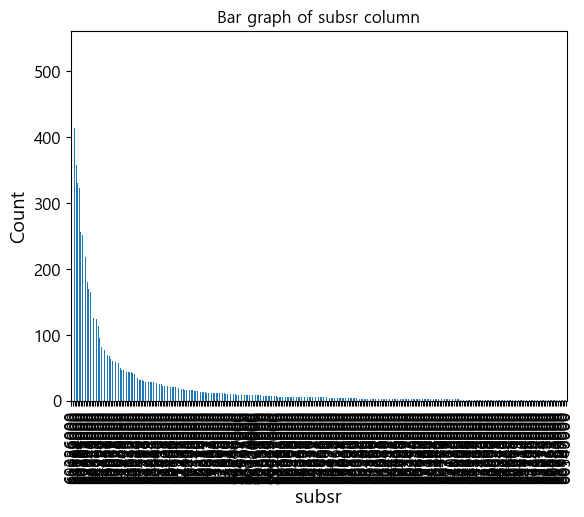

In [7]:
# Assuming 'vod' is your DataFrame and you want to plot the 'subsr' column
value_counts_subsr.plot(kind='bar')

plt.title('Bar graph of subsr column')
plt.xlabel('subsr')
plt.ylabel('Count')

plt.show()


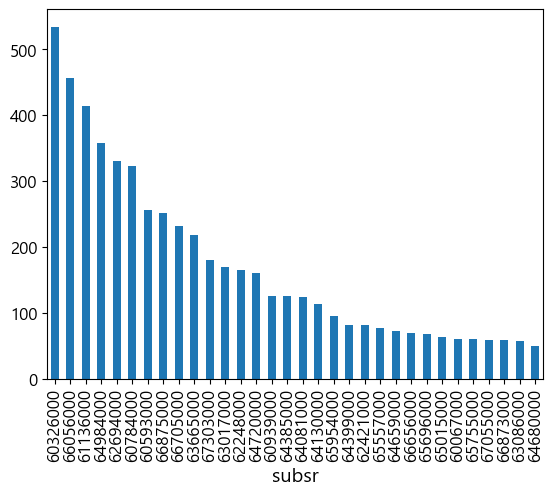

--------------------------


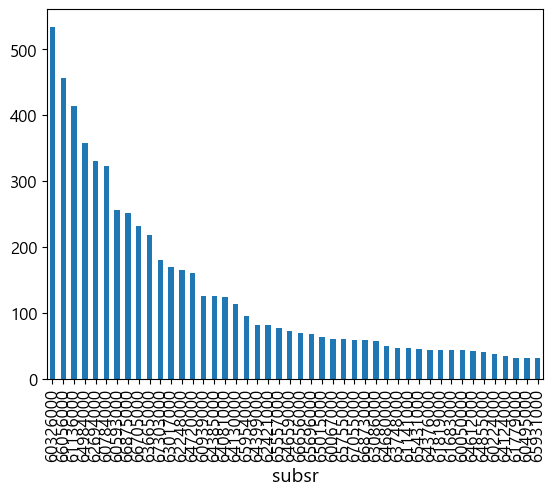

In [8]:
# 상위 10% 셉톱박스 사용자 
tmp = value_counts_subsr.quantile(0.9)
top_10_percent = value_counts_subsr[value_counts_subsr > tmp]
# print(top_10_percent)
top_10_percent.plot(kind='bar')
plt.show()
print("--------------------------")
# 30회 이상 시청 자 
top_counts = value_counts_subsr[value_counts_subsr > 30]
# print(top_counts)
top_counts.plot(kind='bar')
plt.show()

In [20]:
# 작품 빈도수 
value_counts_asset_nm = vod['asset_nm'].value_counts()
print(value_counts_asset_nm)
print(len(value_counts_asset_nm))

asset_nm
(FREE)아내의 속사정:음란한 거래(무료)         503
(FREE)화사한 그녀(무료)                  67
(FREE)블라인드(2014)(무료)              57
(FREE)연평해전(무료)                    39
(FREE)(더빙)추억의 검정고무신(무료)           35
                                ... 
육룡이 나르샤 07회                        1
검법남녀 01회                           1
선덕여왕(상) 05회                        1
정글의 법칙 in 로스트 정글 02회               1
피도 눈물도 없이(KBS) 049회(24/03/29)      1
Name: count, Length: 3625, dtype: int64
3625


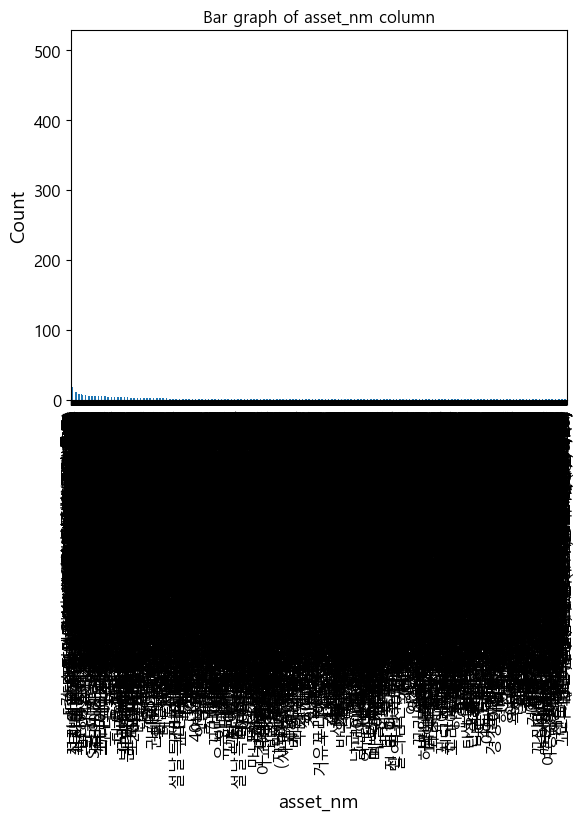

In [10]:
# Assuming 'vod' is your DataFrame and you want to plot the 'subsr' column
# 작품 빈도수 막대 그래프
value_counts_asset_nm.plot(kind='bar')

plt.title('Bar graph of asset_nm column')
plt.xlabel('asset_nm')
plt.ylabel('Count')

plt.show()


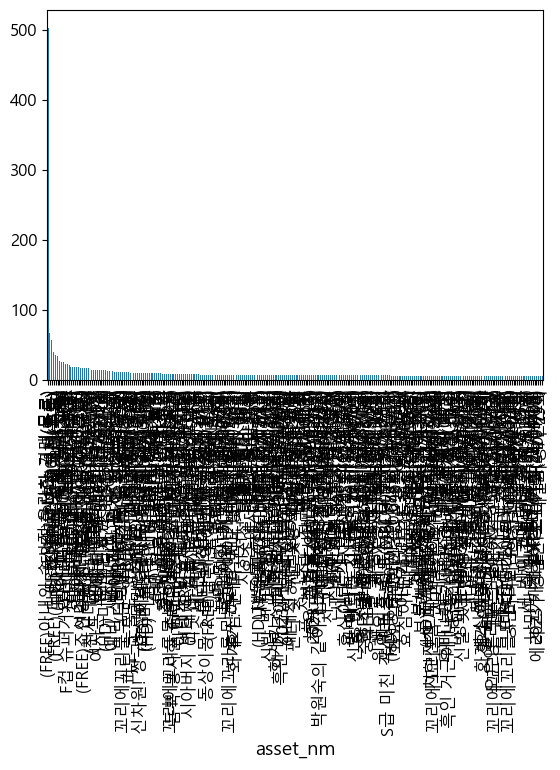

------------------


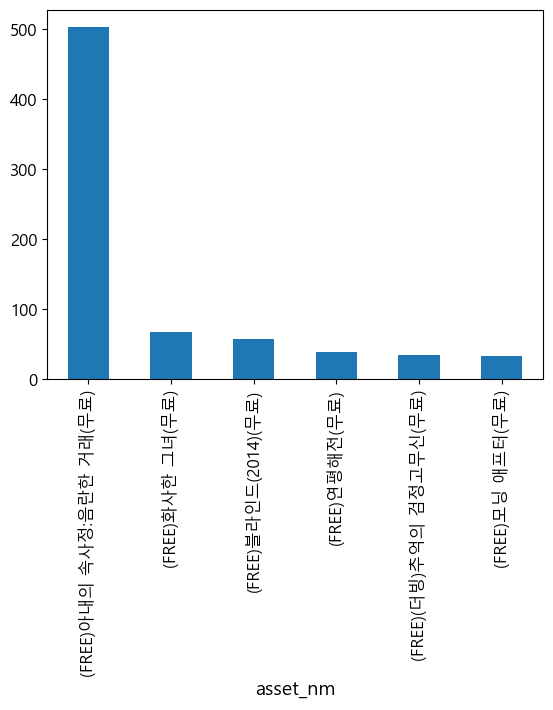

In [12]:
# 상위 10% 작품 빈도 출력
# 의미가 없음
tmp = value_counts_asset_nm.quantile(0.9)
top_10_percent = value_counts_asset_nm[value_counts_asset_nm > tmp]
# print(top_10_percent)
top_10_percent.plot(kind='bar')
plt.show()
print("------------------")

# 작품 빈도수가 30 인상인 작품만 
# 
top_counts = value_counts_asset_nm[value_counts_asset_nm > 30]
# print(top_counts)
top_counts.plot(kind='bar')
plt.show()

In [21]:
#(무료)가 제외된 작품의 빈도수
selected_rows = vod[~vod['asset_nm'].str.contains('무료')]
value_counts_asset_nm_nonefree = selected_rows['asset_nm'].value_counts()

print(value_counts_asset_nm_nonefree)
print(len(value_counts_asset_nm_nonefree))
# print(3625-3592)

asset_nm
밤에 피는 꽃 10회(24/02/10)            25
(할인)욕정 섹파 소굴                     25
밤에 피는 꽃 09회(24/02/09)            23
(더빙)겨울왕국                         22
F컵 슈퍼거유 30대 유부녀 남편몰래 NTR         21
                                 ..
2024 WWE 스맥다운 12회                 1
핑크퐁 인체송 02회                       1
육룡이 나르샤 07회                       1
검법남녀 01회                          1
피도 눈물도 없이(KBS) 049회(24/03/29)     1
Name: count, Length: 3592, dtype: int64
3592
33


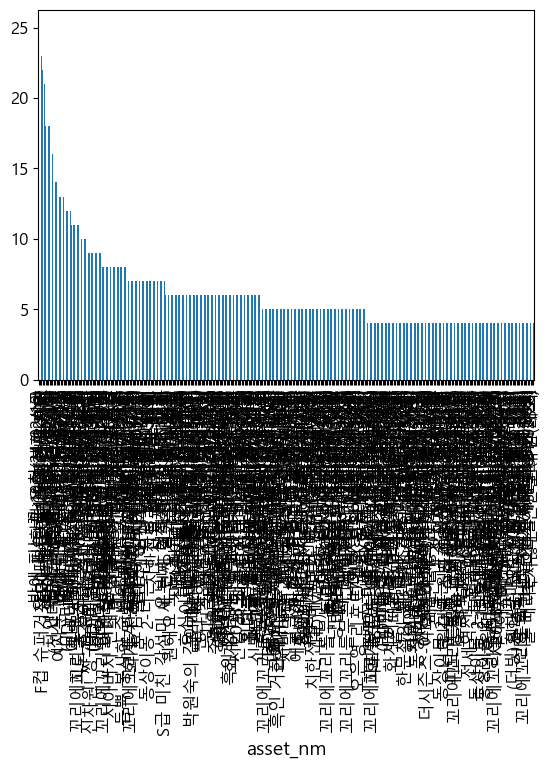

------------------


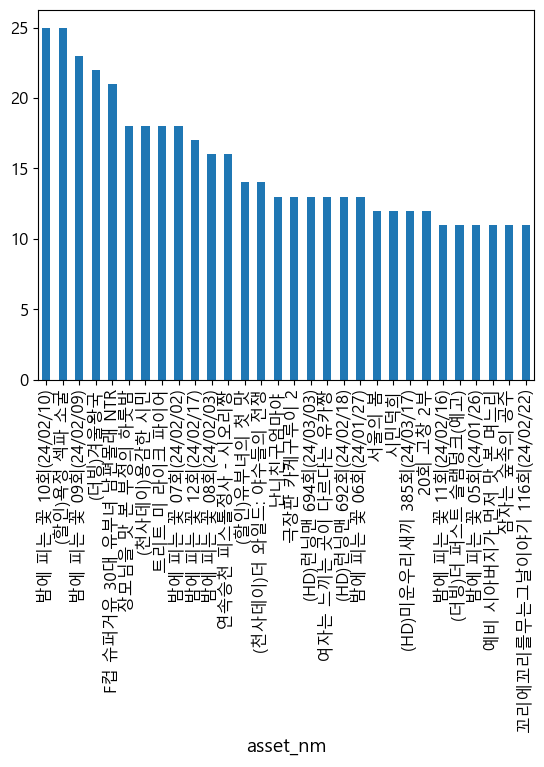

In [24]:
# 상위 10% 작품 빈도 출력
top_10_percent_nonefree = value_counts_asset_nm_nonefree.head(int(len(value_counts_asset_nm_nonefree) * 0.1))
# print(top_10_percent)
top_10_percent_nonefree.plot(kind='bar')
plt.show()
print("------------------")

# 작품 빈도수가 30 인상인 작품만 
# 
top_counts30 = value_counts_asset_nm_nonefree[value_counts_asset_nm_nonefree > 10]
# print(top_counts)
top_counts30.plot(kind='bar')
plt.show()

In [31]:
#(예고)가 제외된 작품의 빈도수
selected_rows = vod[~vod['asset_nm'].str.contains('예고')]
value_counts_asset_nm_nonepre = selected_rows['asset_nm'].value_counts()

print(value_counts_asset_nm_nonepre)
print(len(value_counts_asset_nm_nonepre))
# print(3625-3592)
print("---------------------------------------")
print(value_counts_asset_nm_nonepre[value_counts_asset_nm_nonepre>10].mean())

asset_nm
(FREE)아내의 속사정:음란한 거래(무료)         503
(FREE)화사한 그녀(무료)                  67
(FREE)블라인드(2014)(무료)              57
(FREE)연평해전(무료)                    39
(FREE)(더빙)추억의 검정고무신(무료)           35
                                ... 
(HD)인간극장 3441회(23/12/05)           1
(HD)그것이알고싶다 1379회(23/12/23)        1
(HD)나 혼자산다 529회(24/01/19)          1
련련홍진 : 연애 초보는 열애 중 03회(A)          1
피도 눈물도 없이(KBS) 049회(24/03/29)      1
Name: count, Length: 3217, dtype: int64
3217
---------------------------------------
30.88095238095238


In [44]:
print(len(value_counts_asset_nm_nonepre[value_counts_asset_nm_nonepre > 1]))


1335


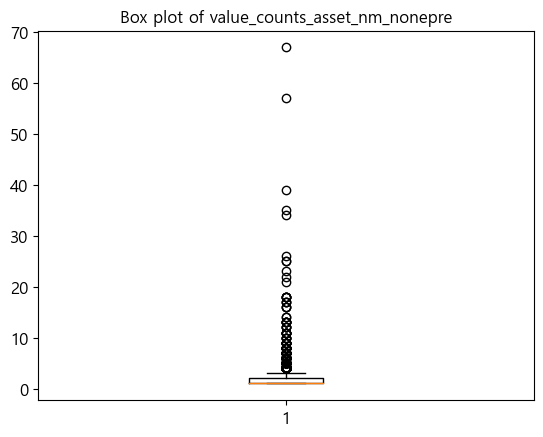

In [43]:
import matplotlib.pyplot as plt

# 박스 플롯을 그립니다.
plt.boxplot(value_counts_asset_nm_nonepre[value_counts_asset_nm_nonepre < 100])
plt.title('Box plot of value_counts_asset_nm_nonepre')
plt.show()


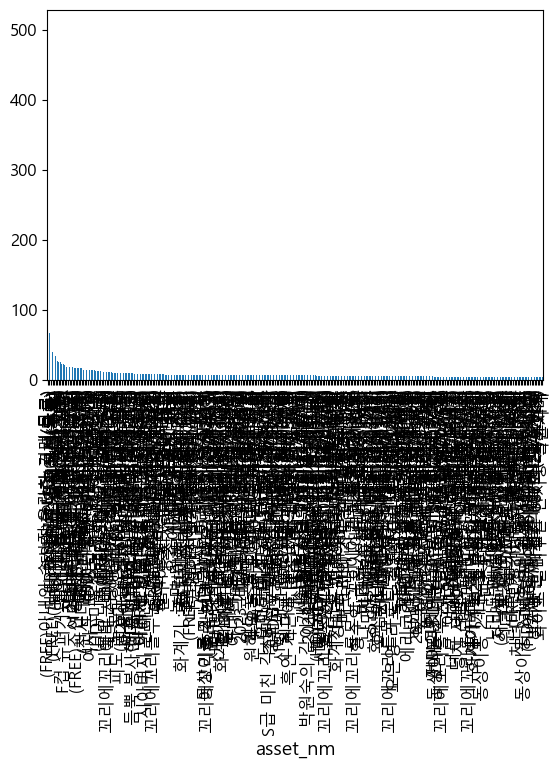

------------------


In [37]:
# 상위 10% 작품 빈도 출력
top_10_percent_nonepre = value_counts_asset_nm_nonepre.head(int(len(value_counts_asset_nm_nonepre) * 0.1))
# print(top_10_percent)
top_10_percent_nonepre.plot(kind='bar')
plt.show()
print("------------------")

asset_nm
(FREE)화사한 그녀(무료)                67
(FREE)블라인드(2014)(무료)            57
(FREE)연평해전(무료)                  39
(FREE)(더빙)추억의 검정고무신(무료)         35
(FREE)모닝 애프터(무료)                34
(FREE)순천부 : 살인가면(무료)            26
(할인)욕정 섹파 소굴                    25
밤에 피는 꽃 10회(24/02/10)           25
밤에 피는 꽃 09회(24/02/09)           23
(더빙)겨울왕국                        22
F컵 슈퍼거유 30대 유부녀 남편몰래 NTR        21
(FREE)애스 백워즈(무료)                18
(천사데이)용감한 시민                    18
트리트 미 라이크 파이어                   18
밤에 피는 꽃 07회(24/02/02)           18
장모님을 맛 본 부정의 하룻밤                18
(FREE)에어 더 뮤지컬(무료)              17
밤에 피는 꽃 12회(24/02/17)           17
(FREE)조선명탐정: 흡혈괴마의 비밀(무료)       17
연속승천 피스톨정사 - 시오리짱               16
밤에 피는 꽃 08회(24/02/03)           16
(FREE)서부전선(무료)                  16
(할인)유부녀의 첫 맛                    14
(천사데이)더 와일드: 야수들의 전쟁            14
밤에 피는 꽃 06회(24/01/27)           13
(HD)런닝맨 694회(24/03/03)          13
(HD)런닝맨 692회(24/02/18)          13
난니친구엄마야                         13
여자는 느끼는 곳이 

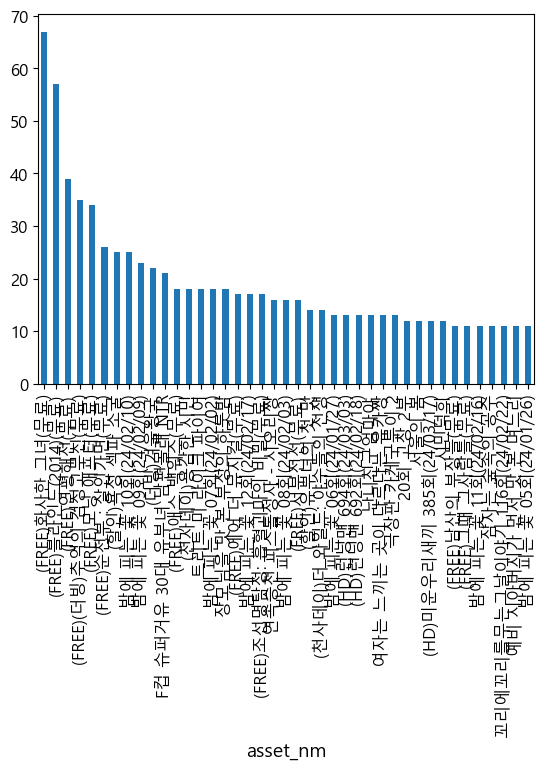

In [39]:
# 작품 빈도수가  10 이상, 100 이하인 작품만 
# 
top_counts30 = value_counts_asset_nm_nonepre[(10 < value_counts_asset_nm_nonepre) & (value_counts_asset_nm_nonepre < 100)]
print(top_counts30)
top_counts30.plot(kind='bar')
plt.show()

In [14]:
# 60326000 번님 죄송
# subsr 값이 60326000인 행만 선택합니다.
selected_rows = vod[vod['subsr'] == 60326000]

# 선택된 행에서 'asset_nm'의 빈도를 계산합니다.
value_counts_60326000 = selected_rows['asset_nm'].value_counts()

print(value_counts_60326000)


asset_nm
성한찬란 56회.       7
천고결진 10회.       5
성한찬란 32회.       5
천고결진 05회.       5
낙유원 06회.        4
               ..
성한찬란 53회.       1
안락전 10회.        1
가유사선미모처 06회.    1
안락전 08회.        1
성한찬란 08회.       1
Name: count, Length: 343, dtype: int64


In [17]:
# subsr의 빈도수를 계산합니다.
# value_counts_subsr = vod['subsr'].value_counts()

# 상위 10%에 해당하는 subsr 값을 구합니다.
top_10_percent_subsr = value_counts_subsr.head(int(len(value_counts_subsr) * 0.1))
print(len(top_10_percent_subsr))

# 상위 10%에 해당하는 subsr 값에 대해 asset_nm의 빈도를 계산합니다.
for subsr in top_10_percent_subsr.index:
    selected_rows = vod[vod['subsr'] == subsr]
    value_counts_asset_nm_per_subsr = selected_rows['asset_nm'].value_counts()
    print(f"subsr: {subsr}, asset_nm 빈도: \n{value_counts_asset_nm_per_subsr}\n")


31
subsr: 60326000, asset_nm 빈도: 
asset_nm
성한찬란 56회.       7
천고결진 10회.       5
성한찬란 32회.       5
천고결진 05회.       5
낙유원 06회.        4
               ..
성한찬란 53회.       1
안락전 10회.        1
가유사선미모처 06회.    1
안락전 08회.        1
성한찬란 08회.       1
Name: count, Length: 343, dtype: int64

subsr: 66056000, asset_nm 빈도: 
asset_nm
(할인)욕정 섹파 소굴                25
(FREE)아내의 속사정:음란한 거래(무료)    15
극장판 카케구루이 2                 13
이윽고 바다에 닿다                   9
극장판 극주부도                     9
                            ..
발정난 가정부언니: 굶주렸어요(예고)         1
그녀는 거짓말을 너무 사랑해              1
새엄마 잠깐 거긴 안돼(예고)             1
미성년이지만 어린애는 아냐               1
만난지3분만에합체 저랑섹스한번하실래요(예고)     1
Name: count, Length: 245, dtype: int64

subsr: 61136000, asset_nm 빈도: 
asset_nm
F컵 슈퍼거유 30대 유부녀 남편몰래 NTR    20
장모님을 맛 본 부정의 하룻밤            16
연속승천 피스톨정사 - 시오리짱           14
여자는 느끼는 곳이 다르다는 유카짱         12
음란한 점장 아내의 유혹               10
                            ..
힐링하우스: 섹스의 왕국                1
혼자 즐기는 옆집 유부녀                1
친구남친에게 벌려주

In [59]:
## disp_rtm 순으로 해보자!
counts_rtm = vod['disp_rtm'].value_counts()
print(counts_rtm.head(30))
# print(len(counts_rtm))
print(counts_rtm['00:00'])
print(counts_rtm['00:03'])


disp_rtm
01:04    663
00:01    504
01:03    465
00:45    423
00:46    230
01:00    212
01:02    182
01:01    164
00:47    163
01:05    156
00:44    154
01:06    149
01:07    132
01:33    116
00:48     90
01:13     88
01:36     88
01:11     88
01:10     84
01:23     84
00:59     83
00:32     82
02:01     82
00:29     81
01:20     77
01:27     75
00:43     75
00:42     75
01:08     72
00:00     72
Name: count, dtype: int64
72
10


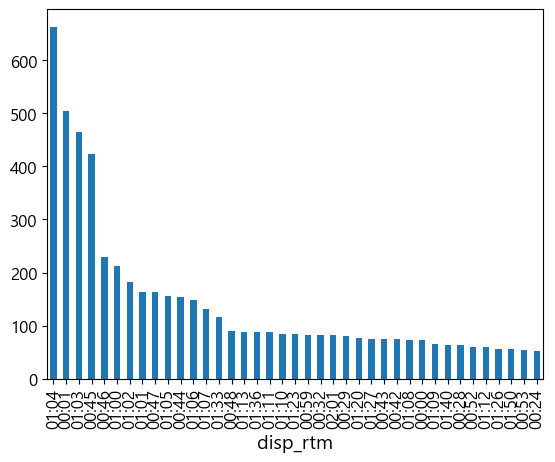

In [55]:
# 러닝 타임의 빈도가 30개 이상인 것들
# 0,1,2 분 애네들이 상위인지 확인하려고
top_counts30 = counts_rtm[counts_rtm >= 50]
top_counts30.plot(kind='bar')
plt.show()